<a href="https://colab.research.google.com/github/Alexassisc/Acidente-Aereo/blob/main/ProjetoGoverna%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Para criação de DataFrames
import numpy as np
import matplotlib.pyplot as plt  #Para plotagem
import random
from collections import Counter
import statistics as static


ocorrencia = pd.read_csv('/content/ocorrencias_cenipa.csv')


In [ ]:
def numeroporcima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

**Limpeza de Dados (Data Cleaning)**

O primeiro processo deste estudo será realizar a limpeza e tratativa dos dados. Vamos inicialmente verificar como a tabela do arquivo "ocorrencia.csv" é apresentada.

In [ ]:
dados.head(5)

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


In [ ]:
print(f'O arquivo \"ocorrencia.csv\" tem {ocorrencia.shape[0]} linhas e {ocorrencia.shape[1]} colunas')

O arquivo "ocorrencia.csv" tem 5242 linhas e 21 colunas


O comando dtypes nos responderá o tipo de dado. 



In [ ]:
ocorrencia.dtypes

codigo                        int64
tipo                         object
descricao                    object
cidade                       object
estado                       object
data                         object
ano                           int64
hora                         object
aeronave_liberada            object
status_investigacao          object
aeronaves_envolvidas          int64
ocorrencia_saida_pista       object
aeronave_tipo                object
aeronave_fabricante          object
motor_tipo                   object
aeronave_motor_quantidade    object
aeronave_assentos             int64
aeronave_ano_fabricacao       int64
aeronave_pais_fabricante     object
aeronave_fase_operacao       object
aeronave_nivel_dano          object
dtype: object

O próximo passo é tratar os nomes das colunas que iremos trabalhar. Antes de mais nada, vamos exibir cada uma delas, usando o comando columns da biblioteca pandas.

In [ ]:
ocorrencia.columns

Index(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'],
      dtype='object')

Ocorrencia.csv é um arquivo relativamente grande. Ele possui muitas linhas e colunas que concedem muitos detalhes a cerca da ocorrência registrada, contudo, não precisamos de todas elas para esse estudo. A fim de deixar a exibição mais apresentável e limpa, vamos eliminar algumas colunas que não precisaremos, como o numero do relatório, comando investigador e aerodromo.

In [ ]:
ocorrencia.drop(['hora','aeronave_liberada','aeronaves_envolvidas','ocorrencia_saida_pista','aeronave_tipo','aeronave_fabricante','motor_tipo','aeronave_motor_quantidade','aeronave_assentos','aeronave_ano_fabricacao','aeronave_pais_fabricante','aeronave_fase_operacao','aeronave_nivel_dano'], axis = 1, inplace = True)

Agora temos todas as colunas que precisaremos em nosso dataset, mas, ainda não estou feliz como as elas são nomeadas no arquivo. Por exemplo: poderiamos mudar a coluna codigo_ocorrencia para Código da Ocorrência, a fim de deixar a leitura e entendimento mais nítido. É exatamente isso que vamos fazer no próximo passo. Ao fim, incluirei uma nova coluna que será usada para realizar cálculos.

In [ ]:
#Renomeando colunas do dataset ocorrencia.csv
ocorrencia.columns = ['CÓDIGO DA OCORRENCIA','CLASSIFICAÇÃO','TIPO DE OCORRÊNCIA','LOCALIDADE',
                      'UF','DATA','ANO','STATUS DA INVESTIGAÇÃO']


In [ ]:
#Inserindo coluna para contagem
ocorrencia['CONTAGEM'] = 1

Vamos ver como ficou nosso novo DataFrame.

In [ ]:
ocorrencia.head()

,CÓDIGO DA OCORRENCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,DATA,ANO,STATUS DA INVESTIGAÇÃO,CONTAGEM
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,FINALIZADA,1
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,FINALIZADA,1
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,FINALIZADA,1
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,FINALIZADA,1
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,FINALIZADA,1


**Visualização dos Dados (Data Visualization)**

Nosso DataFrame está mais limpo e apresentável. Agora, vamos realizar alguns Insights em torno dos dados contidos aqui.

As primeiras perguntas que eu gostaria de responder são:

Como é classificada uma ocorrência? Como se divide o total geral nestas categorias?

Para responder a isso, a variável tipo_ocorrencia, vai armazenar as informações deste dataset agrupadas por classificação. A coluna CONTAGEM será somada, retornando um gráfico com o total de ocorrências para cada classificação.
Ficou confuso? Vamos ver como funciona na prática!

In [ ]:
#Cores para serem usadas nos gráficos
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

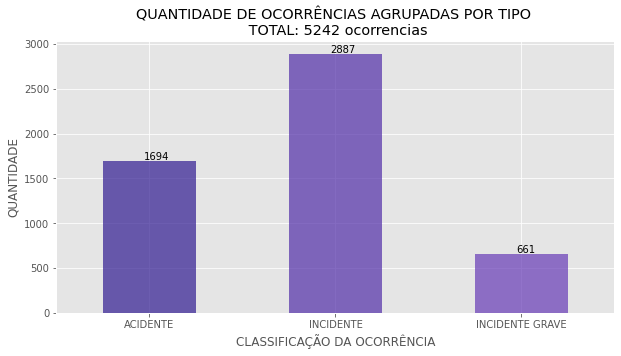

In [ ]:
classificacao = ocorrencia.groupby('CLASSIFICAÇÃO')['CONTAGEM'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)


for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title(f'QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n TOTAL: {ocorrencia["CONTAGEM"].sum()} ocorrencias')
plt.show()

Como podemos ver no gráfico, as ocorrências são divididas em três principais classificações: Acidente, Incidente e Incidente Grave. 

Após classificarmos nossas ocorrências, quero responder a mais uma pergunta:

**Quais os tipos de ocorrências que existem e qual foi sua frequência nestes últimos anos?**

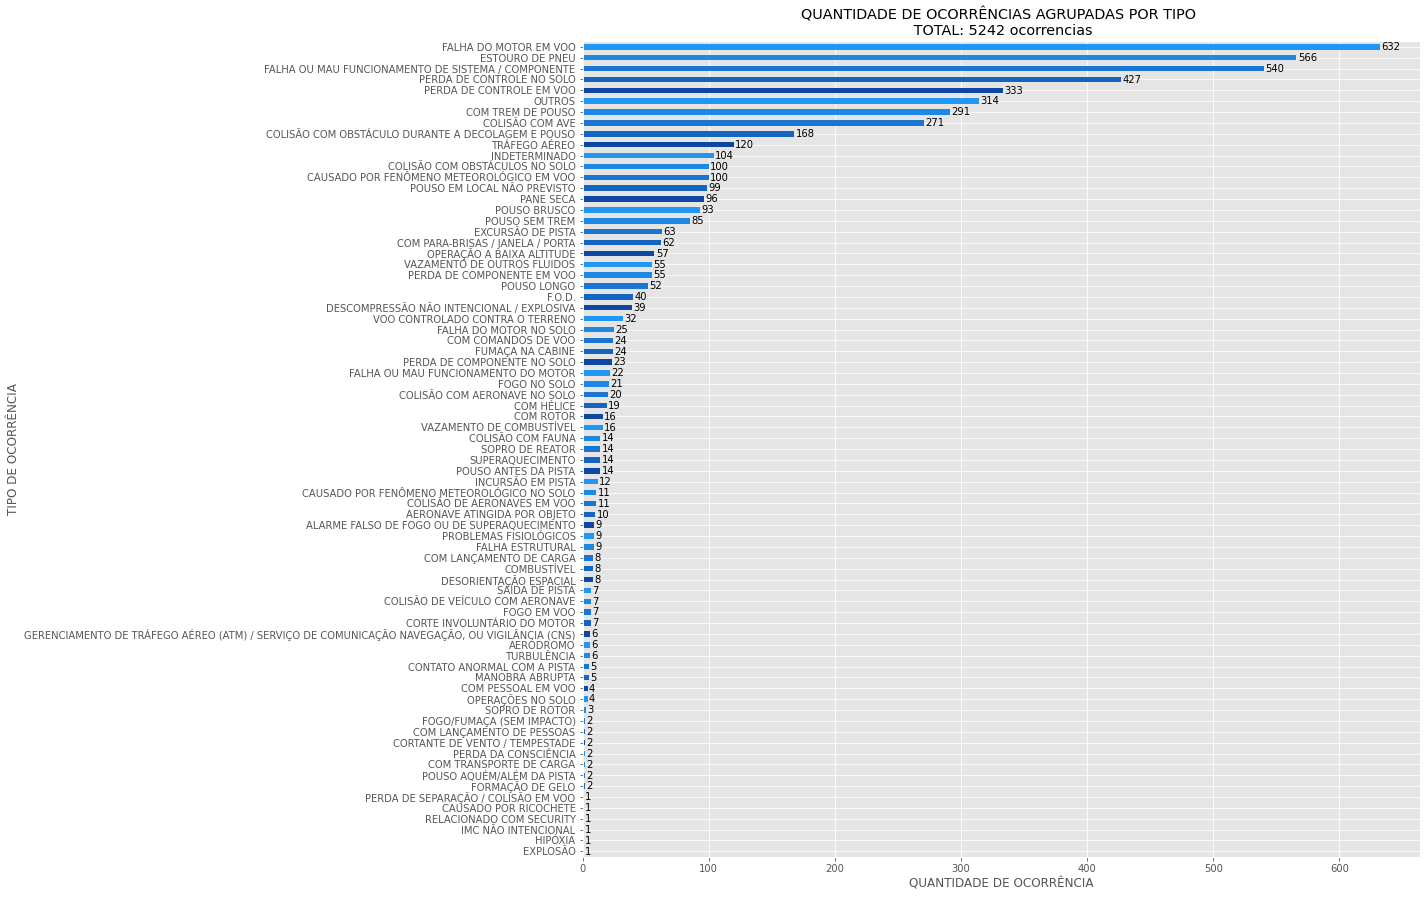

In [ ]:
ax = ocorrencia.groupby('TIPO DE OCORRÊNCIA')['CONTAGEM'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(15,15))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title(f'QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n TOTAL: {ocorrencia["CONTAGEM"].sum()} ocorrencias')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

O processo de geração deste gráfico foi semelhante ao anterior: agrupei todos os dados da coluna 'TIPO' e somei os valores da coluna 'CONTAGEM'. Então, realizei a plotagem desses dados para melhor visualização.

De acordo com os dados desse plot, as maiores causas de ocorrências são devidas a falhas de motor durante o vôo, seguida por perda de controle em solo e perda de controle em vôo. Embora tais causas nos remetam a falha humana na operação, não podemos levar isto como uma regra. Uma perda de controle em vôo pode dever-se desde incompetência técnica até falha em dispositivos como o radar. Todavia, a escala destes três principais motivos é uma causa a se preocupar.

Seguindo nosso estudo, vamos responder a próxima pergunta:

**Como tem sido a progressão desses últimos anos? Tiveram menos ocorrências ou mais?**

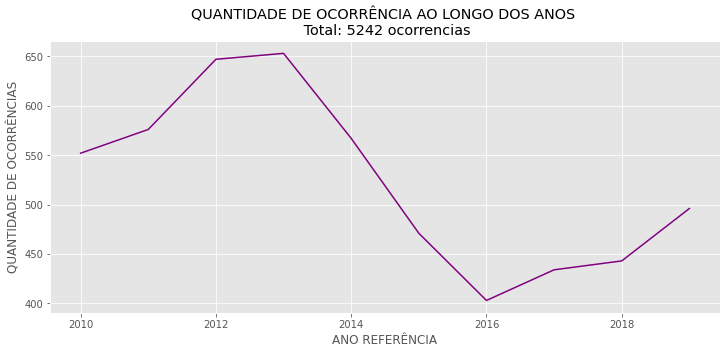

In [ ]:
plotagem_data = ocorrencia.copy()
plotagem_data['DATA'] = plotagem_data['DATA'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('DATA')['CONTAGEM'].sum().plot(color='purple', figsize=(12,5), grid=True)

plt.title(f'QUANTIDADE DE OCORRÊNCIA AO LONGO DOS ANOS \n Total: {ocorrencia["CONTAGEM"].sum()} ocorrencias')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

A progressão de ocorrências aéres nos últimos 10 anos tem crescido assustadoramente. Enquanto em 2016 tivemos menos que 430 ocorrências, em 2013 esse número subiu para quase 700! Vale lembrar que, em 2012 foi o ano do maior desastre aéreo já ocorrido no Brasil: o acidente do avião da TAM, que matou 194 pessoas. A boa notícia é que, de 2012 até agora o número de ocorrências tem diminuído.

**E quanto aos estados? Quais foram os que mais registraram ocorrências?**

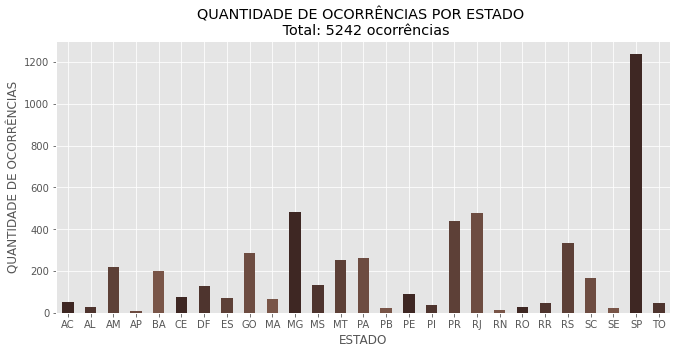

In [ ]:
ax_estado =  ocorrencia.groupby('UF')['CONTAGEM'].sum().plot(kind='bar', color=random.choice(colors), figsize=(11,5))


plt.xlabel('ESTADO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.title(f'QUANTIDADE DE OCORRÊNCIAS POR ESTADO \n Total: {ocorrencia["CONTAGEM"].sum()} ocorrências')
plt.xticks(rotation=0)
plt.show()

O Estado de São Paulo foi o que mais teve ocorrências. O número preocupante é maior do que os encontrados em todos os estados da região sudeste juntos! É de conhecimento que São Paulo é o estado com mais aeroportos do Brasil o que nos permitiria cogitar que este é o motivo de tantas ocorrências, não obstante, outros estados com muitos aeroportos como: Goiás, Maranhão, Mato Grosso e Minas Gerais obtiveram um score consideravelmente menor que o estado de São Paulo.


In [ ]:
cidade = Counter(ocorrencia['LOCALIDADE'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador_cidade = sorted(list(cidade.values()), reverse = True)

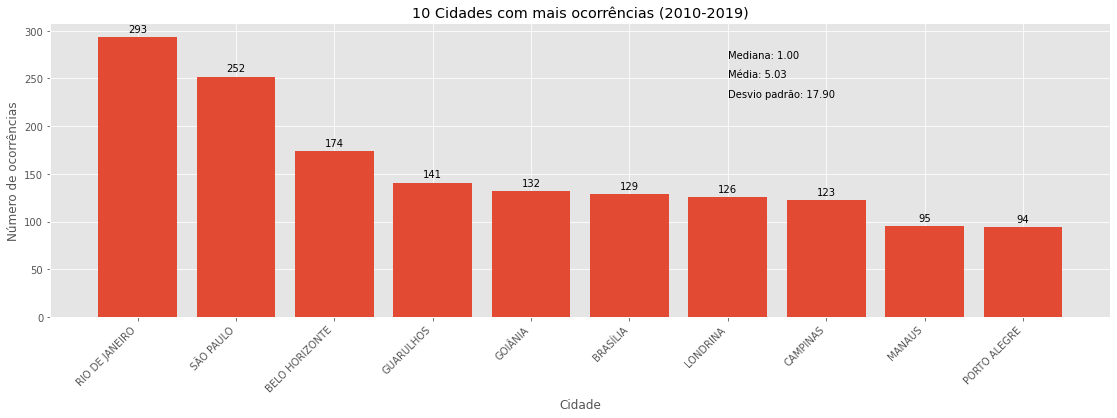

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 6))

x=fase_cidade[:10]
y=contador_cidade[:10]

rects1=ax.bar(x, y)

plt.xlabel('Cidade') 
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('10 Cidades com mais ocorrências (2010-2019)')
plt.text(6, 270.9, 'Mediana: %.2f'%(np.median(np.array(contador_cidade))))
plt.text(6, 250.9, 'Média: %.2f'%(np.mean(np.array(contador_cidade))))
plt.text(6, 230.8, 'Desvio padrão: %.2f'%(static.stdev(contador_cidade)))  

numeroporcima(rects1, ax)

plt.show()

Nota-se que a cidade com maior quantidade de ocorrências nesse período foi Rio de Janeiro com 293, visto que além da alta demanda de voos comerciais e privados,a geografia do relevo não é menos favorável.

Dos 5568 municípios no Brasil, 1042 tiveram pelo menos 1 ocorrência aeronáutica e isso corresponde a 18,71% das cidades brasileiras

A média de ocorrência por cidade ficou em 5.03 durante esse período

A porcentagem de ocorrências das 10 cidades corresponde a 29% do total